In [ ]:
#Load the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Leaf_disease_prediction_dataset/Dataset"

'Corn_(maize)___Common_rust_'   Potato___Early_blight   Tomato___Bacterial_spot


Import the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Flatten,Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.15.0


Visualizing the images and resize the images

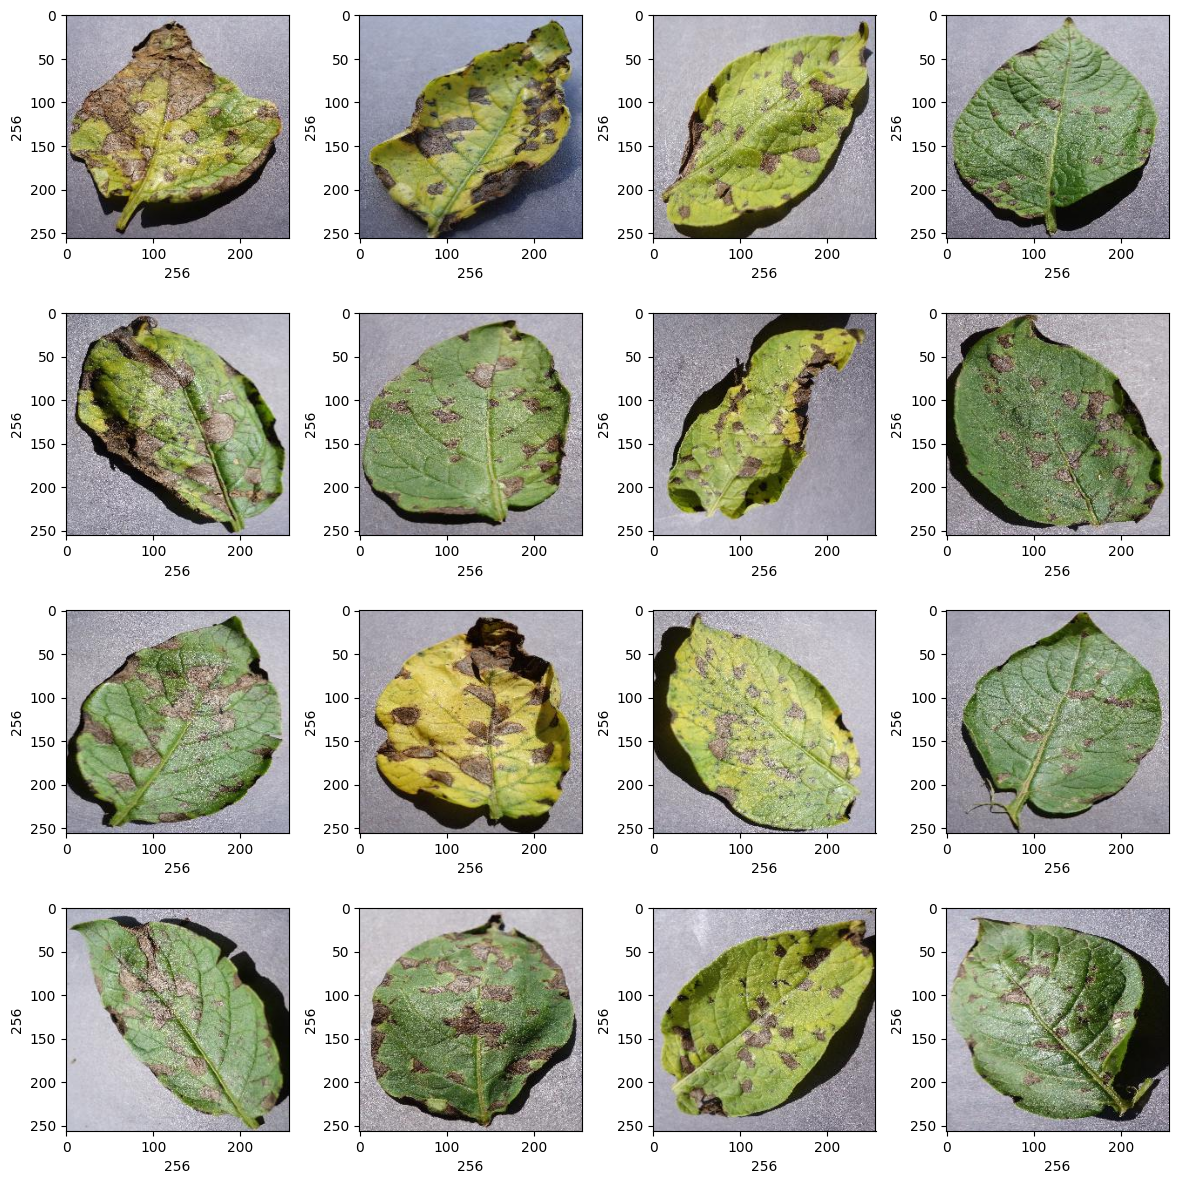

In [ ]:
#Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path='/content/drive/MyDrive/Leaf_disease_prediction_dataset/Dataset/Potato___Early_blight'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path +'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10) #width of the image
  plt.ylabel(rand_img.shape[0],fontsize=10)


Convert the images into numpy array and normalise the array

In [ ]:
# Convert the images to array
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error:{e}")
    return None


Converting all the images into numpy array


In [ ]:
dir="/content/drive/MyDrive/Leaf_disease_prediction_dataset/Dataset"
image_list,label_list=[],[]
all_labels=['Corn_(maize)___Common_rust_',   'Potato___Early_blight',   'Tomato___Bacterial_spot']
binary_labels=[0,1,2]
temp = -1


 #Readiing and converting image to numpy array

for directory in ['Corn_(maize)___Common_rust_',   'Potato___Early_blight',   'Tomato___Bacterial_spot']:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

Visualise the class count and check for class imbalance

In [ ]:
#Visualize the number of class count
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
Name: count, dtype: int64

In [ ]:
image_list[0].shape

(256, 256, 3)

Splitting the dataset into train,validate and test sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [ ]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)


Performing one-hot encoding on target variable


In [ ]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

Creating model architecture,compile the model and then fit it using training data

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation ="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 8)                 9

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=10)

In [ ]:
#Training the model
epochs=50
batch_size=128
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/50
5/5 [==============================] - 48s 10s/step - loss: 1.0348 - accuracy: 0.3767 - val_loss: 0.9473 - val_accuracy: 0.3819
Epoch 2/50
5/5 [==============================] - 46s 9s/step - loss: 0.9101 - accuracy: 0.5156 - val_loss: 0.8334 - val_accuracy: 0.6667
Epoch 3/50
5/5 [==============================] - 43s 9s/step - loss: 0.7916 - accuracy: 0.8420 - val_loss: 0.7170 - val_accuracy: 0.8611
Epoch 4/50
5/5 [==============================] - 43s 9s/step - loss: 0.6749 - accuracy: 0.7205 - val_loss: 0.6027 - val_accuracy: 0.7847
Epoch 5/50
5/5 [==============================] - 47s 10s/step - loss: 0.5754 - accuracy: 0.9062 - val_loss: 0.5048 - val_accuracy: 0.8611
Epoch 6/50
5/5 [==============================] - 51s 10s/step - loss: 0.4804 - accuracy: 0.8472 - val_loss: 0.4234 - val_accuracy: 0.9792
Epoch 7/50
5/5 [==============================] - 44s 9s/step - loss: 0.4031 - accuracy: 0.9757 - val_loss: 0.3427 - val_accuracy: 0.9931
Epoch 8/50
5/5 [===============

In [ ]:
model.save('/content/drive/MyDrive/Leaf_disease_prediction_dataset/Model/plant_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


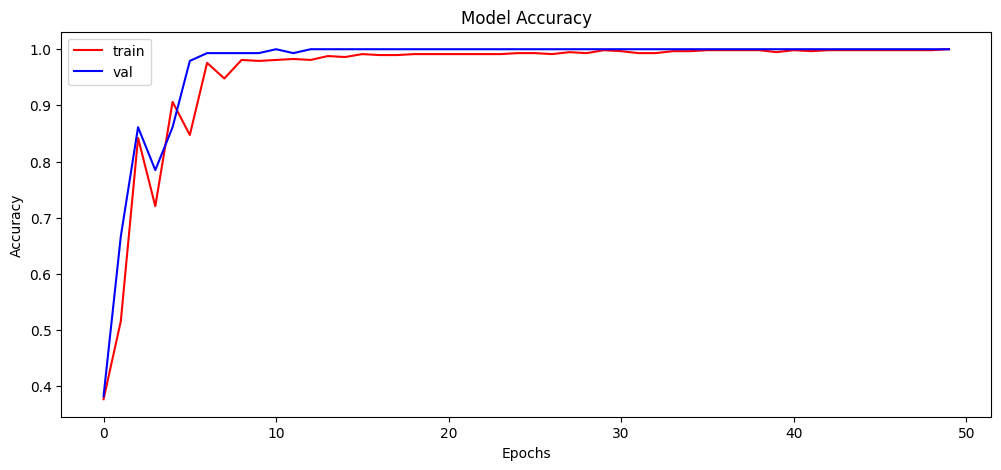

In [ ]:
#Plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

Evaluating the model to know the accuracy of the model

In [ ]:
print('Calculating model accuracy')
scores=model.evaluate(x_test,y_test)
print(f'Test Accuracy : {scores[1]*100}')

Make predictions on testing data

In [ ]:
y_pred=model.predict(x_test)

Visualizing the original and predicted labels for testimages

In [ ]:
#Plotting image to compare
img=array_to_img(x_test[11])
img

In [ ]:
#Finding max value from prediction list and comparing original value as predicted
print('Original Label: ',all_labels[np.argmax(y_test[11])])
print('Original Label: ',all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

In [ ]:
for i in range(50):
  print(all_labels[np.argmax(y_test[i])]," ",all_labels[np.argmax(y_pred[i])])